# Importing Libraries

In [2]:
import numpy as np #numpy for arithmatic operation
import pandas as pd # pandas for dataset operations
import matplotlib.pyplot as plt # visualization library
%matplotlib inline              
import seaborn as sns           #scientific visualization
from sklearn.model_selection import train_test_split # dataset split for training and test
from sklearn.tree import DecisionTreeClassifier # Decision tree model library
from sklearn.neighbors import KNeighborsClassifier # KNN model Library
from sklearn.ensemble import RandomForestClassifier # random forest model library
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix #performance evaluation metrics
from sklearn.metrics import f1_score #performance evaluation metrics for F1 score
# Feature Dimention Reduction by PCA 
from sklearn.decomposition import PCA


# A. Downloading the datasets

## 1. Importing the dataset

In [3]:
df=pd.read_csv('dataset/data/covertype_csv.csv')

## 2.	Describe the dataset and the classification task, more information about the dataset can be found in UCI repository. 

In [4]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
0,0.368684,0.141667,0.045455,0.184681,0.223514,0.071659,0.870079,0.913386,0.582677,0.875366,...,0,0,0,0,0,0,0,0,0,5
1,0.365683,0.155556,0.030303,0.151754,0.215762,0.054798,0.866142,0.925197,0.594488,0.867838,...,0,0,0,0,0,0,0,0,0,5
2,0.472736,0.386111,0.136364,0.191840,0.307494,0.446817,0.921260,0.937008,0.531496,0.853339,...,0,0,0,0,0,0,0,0,0,2
3,0.463232,0.430556,0.272727,0.173228,0.375969,0.434172,0.937008,0.937008,0.480315,0.865886,...,0,0,0,0,0,0,0,0,0,2
4,0.368184,0.125000,0.030303,0.109520,0.222222,0.054939,0.866142,0.921260,0.590551,0.860449,...,0,0,0,0,0,0,0,0,0,5


In [5]:
df.shape

(581012, 55)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           581012 non-null  float64
 1   Aspect                              581012 non-null  float64
 2   Slope                               581012 non-null  float64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  float64
 4   Vertical_Distance_To_Hydrology      581012 non-null  float64
 5   Horizontal_Distance_To_Roadways     581012 non-null  float64
 6   Hillshade_9am                       581012 non-null  float64
 7   Hillshade_Noon                      581012 non-null  float64
 8   Hillshade_3pm                       581012 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  float64
 10  Wilderness_Area1                    581012 non-null  int64  
 11  Wilderness_Area2          

The dataset contain 581012 and 55 columns. The dataset is used for classification tasks. The dataset does not contain any missing values.This dataset is multivariate. The dataset have cartographic variables that consist of categorical and numeric data types values. The class(covertype) is the target variable that is multiclassification task. 

# B. Data Exploration:


## 3. Display the number of instances.
## 4.	Display the number of attributes.
## 5.    Display the number of classes.

In [7]:
print(f"The data has {df.shape[0]} records, {df.shape[1]} attributes, and {df['class'].unique()} clasess")

The data has 581012 records, 55 attributes, and [5 2 1 7 3 6 4] clasess


##  6.	For each class label, display the code of the class label and the name of that class.


In [8]:
df.groupby('class').size()

class
1    211840
2    283301
3     35754
4      2747
5      9493
6     17367
7     20510
dtype: int64

##  7.	Summarise the class distribution using a suitable graph.


<AxesSubplot:xlabel='class', ylabel='Density'>

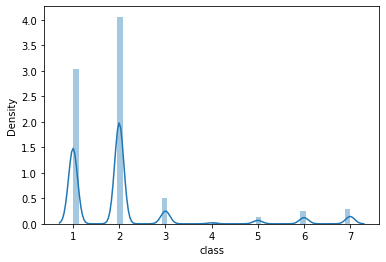

In [9]:
# The instances distribution of target variable can be visualized through countplot
# sns.countplot(df['class'])
sns.distplot(df['class'])

##  8. Display a statistical summary for all the attributes.


In [10]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,0.550458,0.432380,0.213693,0.192862,0.283487,0.330216,0.835221,0.879208,0.561135,0.276076,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,0.140062,0.310871,0.113458,0.152147,0.075317,0.219089,0.105393,0.077830,0.150687,0.184608,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.475238,0.161111,0.136364,0.077309,0.232558,0.155403,0.779528,0.838583,0.468504,0.142758,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.568784,0.352778,0.196970,0.156049,0.262274,0.280596,0.858268,0.889764,0.562992,0.238394,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,0.652326,0.722222,0.272727,0.274875,0.312661,0.467613,0.909449,0.933071,0.661417,0.355500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


#   C. Data Preprocessing


## 9. Check whether the selected dataset has any data quality issues and choose suitable strategies to deal with any issue (if exists).

array([[<AxesSubplot:title={'center':'Elevation'}>,
        <AxesSubplot:title={'center':'Aspect'}>,
        <AxesSubplot:title={'center':'Slope'}>,
        <AxesSubplot:title={'center':'Horizontal_Distance_To_Hydrology'}>,
        <AxesSubplot:title={'center':'Vertical_Distance_To_Hydrology'}>,
        <AxesSubplot:title={'center':'Horizontal_Distance_To_Roadways'}>,
        <AxesSubplot:title={'center':'Hillshade_9am'}>],
       [<AxesSubplot:title={'center':'Hillshade_Noon'}>,
        <AxesSubplot:title={'center':'Hillshade_3pm'}>,
        <AxesSubplot:title={'center':'Horizontal_Distance_To_Fire_Points'}>,
        <AxesSubplot:title={'center':'Wilderness_Area1'}>,
        <AxesSubplot:title={'center':'Wilderness_Area2'}>,
        <AxesSubplot:title={'center':'Wilderness_Area3'}>,
        <AxesSubplot:title={'center':'Wilderness_Area4'}>],
       [<AxesSubplot:title={'center':'Soil_Type1'}>,
        <AxesSubplot:title={'center':'Soil_Type2'}>,
        <AxesSubplot:title={'center':'S

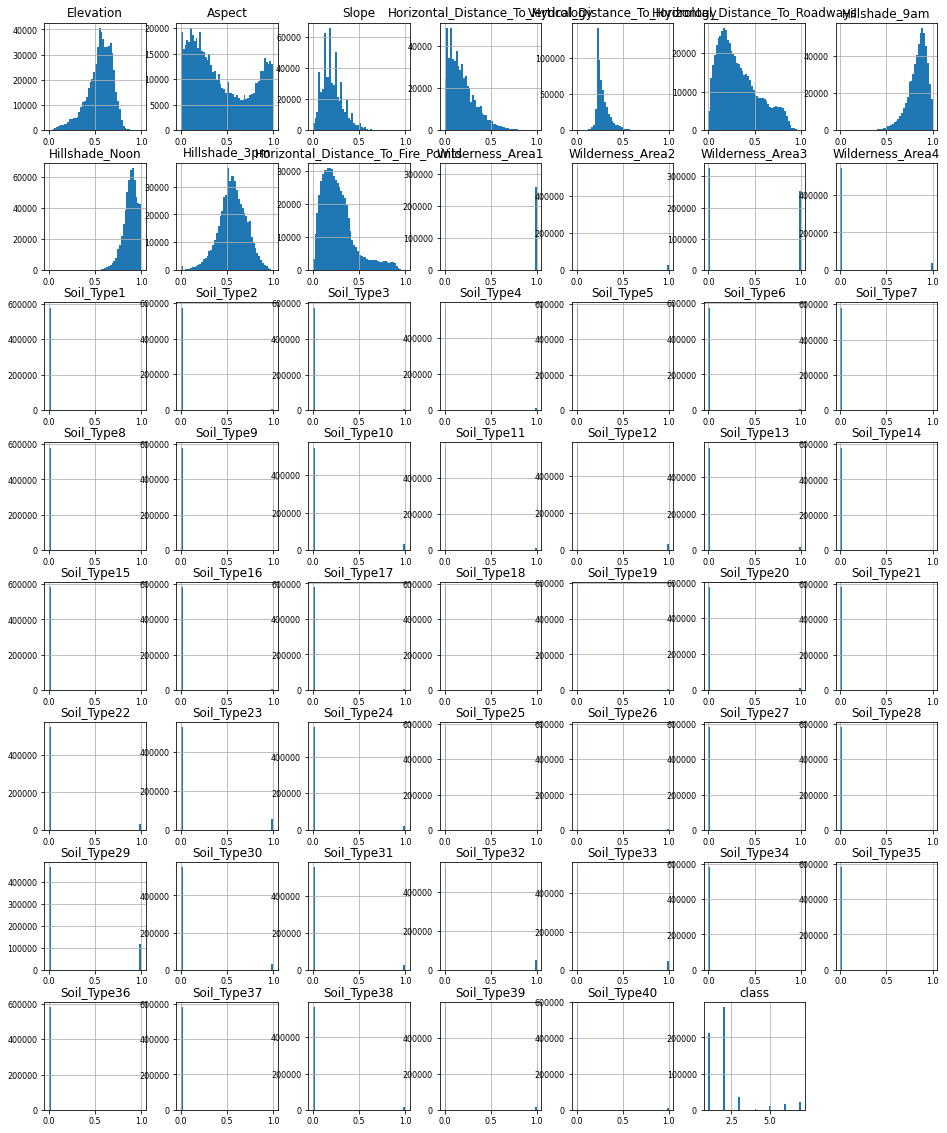

In [11]:

# we check the quality of data through histogram that tell about the distribution of the dataset. The overall distributon of dataset
#standard normal distributon. however some attributes contain abnormal distribution. 
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

##  10.	Convert the multiclass classification problem into a binary classification problem.

In [12]:
# convert classes that has a value grater than 4 to 1
df.loc[df['class'] <= 3] = 0 
# convert classes that has a value less than 3 to 0
df.loc[df['class'] >= 4] = 1

In [13]:
# just making sure everthing works as expected
df.groupby('class').size()

class
0    530895
1     50117
dtype: int64

In [14]:
# features
X=df.iloc[:, :-1]
X.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,1,1,1,1,1,1,1,1,1
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,1,1,1,1,1,1,1,1,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,1,1,1,1,1,1,1,1,1


In [15]:
#target variable
y=df.iloc[:, -1:]
y.head()

,class
0,1
1,1
2,0
3,0
4,1


## 11. Use a features selection technique to select those features in your data that contribute most to the prediction.

*Take a partial of the data, since it is too big which cause the machine to hang* 


In [16]:
df = df.sample(frac=0.0001, replace=True)

In [17]:
# sample shape
df.shape

(58, 55)

In [22]:
# pca model call
pca = PCA(n_components=8, random_state=42)
# pca model fit on featues
pca.fit(X)

PCA(n_components=8, random_state=42)

In [23]:
# transforming the feautes
X = pca.transform(X)

## 12. Divide your dataset into training, validation and testing datasets.


In [24]:
# test size=30%
# training size 50%
# validation size=20%
random_seed=123
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, 
                                                    train_size=0.5, 
                                                    random_state=42,
                                                    stratify=y_test)
    

# D. classification

## 13.	Build classification models.



### a.	Use three different learning algorithms to generate three classification models. You should choose one learning algorithm from each of the following categories:




### Use a dictionary to store a list of all required classifiers and predection result

In [25]:
# model_names = ['Decision_Tree', 'Nearest_Neighbors', 'Random_Forest']
models = [
    ## Decision_Tree
    {'name': 'Decision_Tree', 'classifier': DecisionTreeClassifier(random_state=24), 'prediction_test': None, 'predictions_vald': None, 'accuracy_test': None, 'accuracy_vald': None},
    ## Nearest_Neighbors
    # {'name': 'Nearest_Neighbors', 'classifier':  KNeighborsClassifier(n_neighbors=3, n_jobs=-1), 'prediction_test': '', 'predictions_vald': '', 'accuracy_test': '', 'accuracy_vald': ''},
    ## Random_Forest
    {'name': 'Random_Forest', 'classifier': RandomForestClassifier(random_state=24), 'prediction_test': None, 'predictions_vald': None, 'accuracy_test': None, 'accuracy_vald': None}
    ]

In [ ]:
# classifiers = [ DecisionTreeClassifier(random_state=24), KNeighborsClassifier(3), RandomForestClassifier(random_state=24) ]

In [ ]:
# models = pd.DataFrame({'model' : model_names, 'classifier' : classifiers})
# models.head()

### fill the dictionary with required data

In [26]:

for model in models: 
    model['classifier'].fit(X_train, y_train)
    model['predictions_test'] =  model['classifier'].predict(X_test)
    model['predictions_vald'] =  model['classifier'].predict(X_val)
    model['accuracy_test'] = accuracy_score(y_test, model['predictions_test'])
    model['accuracy_vald'] = accuracy_score(y_test, model['predictions_vald'])



In [27]:
print(models)

[{'name': 'Decision_Tree', 'classifier': DecisionTreeClassifier(random_state=24), 'prediction_test': None, 'predictions_vald': array([0, 0, 0, ..., 0, 0, 0], dtype=int64), 'accuracy_test': 1.0, 'accuracy_vald': 0.8417706994675969, 'predictions_test': array([0, 0, 0, ..., 0, 0, 0], dtype=int64)}, {'name': 'Random_Forest', 'classifier': RandomForestClassifier(random_state=24), 'prediction_test': None, 'predictions_vald': array([0, 0, 0, ..., 0, 0, 0], dtype=int64), 'accuracy_test': 1.0, 'accuracy_vald': 0.8417706994675969, 'predictions_test': array([0, 0, 0, ..., 0, 0, 0], dtype=int64)}]


In [28]:
for model in models:
    print("Model: ", model['name'])
    print("classification report testing dataset: ", classification_report(y_test, model['predictions_test']))
    print("Confusion matrix for testing dataset: ", confusion_matrix(y_test, model['predictions_test'] ))
    # 
    #  vald_pred = clf.predict(X_val)
    # print("Model: ", name)
    # print("classification report validation dataset: ", classification_report(y_vald, pred))    
    # print("Confusion matrix for validation dataset: ",  confusion_matrix(y_vald, pred )

Model:  Decision_Tree
classification report testing dataset:                precision    recall  f1-score   support

           0       1.00      1.00      1.00     79614
           1       1.00      1.00      1.00      7538

    accuracy                           1.00     87152
   macro avg       1.00      1.00      1.00     87152
weighted avg       1.00      1.00      1.00     87152

Confusion matrix for testing dataset:  [[79614     0]
 [    0  7538]]
Model:  Random_Forest
classification report testing dataset:                precision    recall  f1-score   support

           0       1.00      1.00      1.00     79614
           1       1.00      1.00      1.00      7538

    accuracy                           1.00     87152
   macro avg       1.00      1.00      1.00     87152
weighted avg       1.00      1.00      1.00     87152

Confusion matrix for testing dataset:  [[79614     0]
 [    0  7538]]


In [ ]:
# predictions
predictions_test = []
predictions_vald = []

for name, clf in zip(model_names, classifiers):
    clf.fit(X_train, y_train)
    predictions_test.append(clf.predict(X_test))
    predictions_vald.append(clf.predict(X_val))




In [ ]:
# Accucarcy
accuracy_test = []

for name, pred in zip(model_names, predictions_test):
    score = accuracy_score(y_test, pred)
    accuracy.append(score)
    print(f'{name} test accuracy is {score}')


In [ ]:
accuracy_vald = []
    
for name, pred in zip(model_names, predictions_vald):
    score = accuracy_score(y_test, pred)
    accuracy.append(score)
    print(f'{name} validation accuracy is {score}')

#### i.	Decision Tree

In [ ]:
dtree = DecisionTreeClassifier(random_state=24) # using the random state for reproducibility

In [ ]:
# decision tree model training
dtree = dtree.fit(X_train, y_train)

In [ ]:
# decision tree model prediction on test data
dtree_pred = dtree.predict(X_test)

In [ ]:
# Evaluate our decision tree model
print(classification_report(y_test, dtree_pred))


#### ii. Nearest Neighbor Classifier, ~~Naive Bayes Classifier, Support Vector Machine~~

#### iii.   ~~Bagging, Boosting,~~ Random Forest

## 14.	For each classification model:


a.	Try to find the most accurate classifier (avoid overfitting).


# E. Evaluation

## 15.	Evaluate your classification models on the validation and the testing datasets.


In [ ]:
for name, pred in zip(model_names, predictions_test):
    print("Model: ", name)
    print("classification report testing dataset: ", classification_report(y_test, pred))
    print("Confusion matrix for testing dataset: ", confusion_matrix(y_test, pred ))
    

In [ ]:
for name, pred in zip(model_names, predictions_vald):
    vald_pred = clf.predict(X_val)
    print("Model: ", name)
    print("classification report validation dataset: ", classification_report(y_vald, pred))    
    print("Confusion matrix for validation dataset: ",  confusion_matrix(y_vald, pred )

### a.	For each classification model, print out a confusion matrix for the validation and testing datasets.


### b. Use the following evaluation measures to evaluate the performance of the generated classification models:
###    *i. Accuracy	ii. Error rate	iii. F -measure*

- #### *Testing Dataset*

In [ ]:
for name, score in (model_names, accuracy_test):
    print("Model:", name)
    print("Accuracy score:", score)
    print("Error rate:", 1 - score)
    print("F1 Score:", )

##### i.Accuracy

In [ ]:
model_accuracy=accuracy_score(y_test, y_pred)
print(model_accuracy)

##### ii. Error rate

In [ ]:
error_rate = 1 - model_accuracy
print(error_rate)

##### iii. F -measure

In [ ]:
print ('F1 score:', f1_score(y_test, y_pred))

- #### Validation Dataset


##### i. accuracy


In [ ]:
classifier_accuracy=accuracy_score(y_test, prediction)
print('Accuracy:',classifier_accuracy)

##### ii. error rate


In [ ]:
error_rate_val=1-classifier_accuracy
print('error_rate:',error_rate_val)

##### iii. F-measure

In [ ]:
print ('F1 score:', f1_score(y_test, prediction))

## 16. Compare between the performances of all the classification models using suitable chart (The type of chart should be different from the type of the chart that is used in the data exploration stage).


In [ ]:
#checking model result
dt_accuracy
rf_accuracy
knn_accuracy
print(dt_accuracy)
print(rf_accuracy)
print(knn_accuracy)

In [ ]:
models=['dt_accuracy', 'rf_accuracy', 'knn_accuracy']
accuracy=[0.97, 1.0, 0.95]
plt.bar(models, accuracy)
plt.title('Accuracy of Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()